In [1]:
% matplotlib

Using matplotlib backend: TkAgg


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import time
from datetime import datetime, date

In [2]:
df = pd.read_csv('trainset.csv')

In [3]:
df_test = pd.read_csv('testset.csv')

### 丟棄'name', 'seller', 'offerType', 'model', 'nrOfPictures'

In [4]:
df = df.drop(['name', 'seller', 'offerType', 'model', 'nrOfPictures' ], axis = 1)

In [5]:
df_test = df_test.drop(['name', 'seller', 'offerType', 'model', 'nrOfPictures' ], axis = 1)

In [6]:
#print(df.shape)
#print df.columns

In [7]:
#print(df_test.shape)
#print df_test.columns

### 01 'dateCrawled': 

### 02 'price': 把(price < 150) & (price > 15000)的資料丟掉

In [8]:
#print sorted(df.price)[55]
#print sorted(df.price)[-50]

In [9]:
#df.price.describe()

In [10]:
df = df[(df.price < 15000)&(df.price > 150)]
print df.shape

(5413, 16)


### 03 'abtest':

In [11]:
df = df[df.abtest.isnull() == False]
print df.shape

(5413, 16)


In [13]:
#print len(df_test[df_test.abtest.isnull()])

### 04 'vehicleType':    

kombi    bus    limousine    kleinwagen    suv    coupe    andere          
旅行車 公共汽車 四門轎車 小型車 SUV 轎跑車  others

In [14]:
df = df[df.vehicleType != 'andere']
df = df[df.vehicleType.isnull() == False]
print df.shape

(5370, 16)


In [15]:
#df.vehicleType.value_counts()

In [16]:
#df_test.vehicleType.value_counts()

In [17]:
#print len(df_test[df_test.vehicleType.isnull()])

### 05 'yearOfRegistration': 剔除2017年

In [18]:
df = df[df.yearOfRegistration<2017]
print df.shape

(5370, 16)


In [19]:
#print sorted(df.yearOfRegistration)[:20]

In [20]:
#print sorted(df_test.yearOfRegistration)[:20]

In [21]:
#print len(df_test[df_test.yearOfRegistration.isnull()])

### 06 'gearbox':

In [22]:
df = df[df.gearbox.isnull() == False]
print df.shape

(5356, 16)


In [23]:
#print len(df_test[df_test.gearbox.isnull()])

### 07 'powerPS': test set有大量powerPS = 0的樣本 

In [24]:
#print sorted(df.powerPS)[:280]
#print sorted(df.powerPS)[-10:]

In [26]:
#print sorted(df_test.powerPS)[:280]
#print sorted(df_test.powerPS)[-10:]

In [27]:
#print len(df[df.powerPS==0])
#print len(df_test[df_test.powerPS==0])

In [28]:
df = df[(df.powerPS > 0)&(df.powerPS < 500)]
print df.shape

(5100, 16)


In [29]:
#print(df.powerPS.mean())
#print(df_test.powerPS.mean())

In [30]:
df_test.powerPS[(df_test.powerPS == 0) | (df_test.powerPS > 500)] = df_test.powerPS.mean()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
#print len(df_test[df_test.powerPS.isnull()])

### 08 'kilometer':

In [32]:
df = df[df.kilometer.isnull() == False]
print df.shape

(5100, 16)


In [33]:
#print len(df_test[df_test.kilometer.isnull()])

### 10 'fuelType':

In [34]:
df = df[df.fuelType != 'elektro']
df = df[df.fuelType.isnull() == False]
print df.shape

(5085, 16)


In [35]:
#df.fuelType.value_counts()

In [36]:
#df_test.fuelType.value_counts()

In [37]:
#print len(df_test[df_test.fuelType.isnull()])

### 11 'brand': 5台lada車 在train set沒出現

In [38]:
df = df[df.brand.isnull() == False]
print df.shape

(5085, 16)


In [39]:
#print len(df_test[df_test.brand.isnull()])

In [41]:
#set(df_test['brand'])-set(df['brand'])

In [42]:
#print len(df_test[df_test.brand == 'lada'])
#print len(df_test[df_test.brand == 'lada'].dropna())

### 12 'notRepairedDamage':

In [43]:
df = df[df.notRepairedDamage.isnull() == False]
print df.shape

(5043, 16)


In [44]:
#print len(df_test[df_test.notRepairedDamage.isnull()])

In [23]:
##df.notRepairedDamage[df.notRepairedDamage=='nein']=1.
##df.notRepairedDamage[df.notRepairedDamage=='ja']=0.

### 13 'dateCreated':

### 15 'lastSeen':

### 09 'monthOfRegistration': 

In [39]:
# df.monthOfRegistration.value_counts().sort_index()
# df_test.monthOfRegistration.value_counts().sort_index()

In [41]:
#print sorted(df.yearOfRegistration[df.monthOfRegistration==0])[-10:]
#print sorted(df_test.yearOfRegistration[df_test.monthOfRegistration==0])[-10:]
#print df_test[df_test.monthOfRegistration.isnull()].shape

In [45]:
#df_month_zero_reserv = df
df = df[df.monthOfRegistration!=0]

In [30]:
#df_01 = df_month_zero_reserv
#df_01.monthOfRegistration[df_01.monthOfRegistration==0] = 6

In [46]:
df_test.monthOfRegistration[df_test.monthOfRegistration==0] = 6

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### 16 'ad_exist_time':

In [47]:
#print len(df_test[df_test.ad_exist_time.isnull()])

In [48]:
df_A = df[df.ad_exist_time.isnull()==False ]
df_B = df[df.ad_exist_time.isnull()]

In [49]:
#print( df_A.shape, df_B.shape )

In [50]:
df_B_adExist = []
for idx in df_B.index:
    df_B_adExist = df_B_adExist + [abs(datetime.strptime(df_B['lastSeen'][idx], '%Y/%m/%d %H:%M').date() 
 - datetime.strptime(df_B['dateCreated'][idx], '%Y/%m/%d %H:%M').date() ).days]   

In [51]:
index_B = df_B.index

In [52]:
df_B.index = range(len(df_B.index))

In [53]:
df_B.ad_exist_time = pd.DataFrame(df_B_adExist)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [54]:
df_B.index = index_B
#df_B.head()

### 加入 'ages'屬性：

In [55]:
df_B_ages = []

In [56]:
for idx in df_B.index:
    df_B_ages = df_B_ages + [(datetime.strptime(df_B['dateCrawled'][idx], '%Y/%m/%d %H:%M').date() 
                          - date(df_B['yearOfRegistration'][idx], df_B['monthOfRegistration'][idx], 15 )).days]                     
    

In [57]:
df_B.index = range(len(df_B.index))

In [58]:
df_B = pd.concat([df_B,  pd.DataFrame(df_B_ages)  ], axis=1)
name_list_B = list(df_B.columns)
name_list_B[-1]='ages'
df_B.columns = name_list_B

In [59]:
df_B.index = index_B

In [61]:
#df_B.head(1)

In [62]:
df_A_ages = []

In [63]:
for idx in df_A.index:
    df_A_ages = df_A_ages +[
        (datetime.strptime(df_A['dateCrawled'][idx], '%Y-%m-%dT%H:%M:%SZ').date() 
       - date(df_A['yearOfRegistration'][idx], df_A['monthOfRegistration'][idx], 15 )).days
        ]                     

In [64]:
index_A = df_A.index 
df_A.index = range(len(df_A.index))

In [65]:
df_A = pd.concat([df_A,  pd.DataFrame(df_A_ages)  ], axis=1)
name_list_A = list(df_A.columns)
name_list_A[-1]='ages'
df_A.columns = name_list_A
df_A.index = index_A
#df_A.head(1)

In [66]:
df = pd.concat([df_A,  df_B  ], axis=0)

In [67]:
df_test_ages = []

In [68]:
for idx in df_test.index:
     df_test_ages = df_test_ages + [abs(datetime.strptime(df_test['dateCrawled'][idx], '%Y-%m-%dT%H:%M:%SZ').date() 
                          - date(df_test['yearOfRegistration'][idx], df_test['monthOfRegistration'][idx], 15 )).days]                     
    

In [69]:
df_test = pd.concat([df_test,  pd.DataFrame(df_test_ages)  ], axis=1)
name_test_list = list(df_test.columns)
name_test_list[-1]='ages'
df_test.columns = name_test_list
#df_test.head(1)

In [70]:
df = df.drop([ 'dateCrawled', 'lastSeen', 'dateCreated', 'monthOfRegistration' ], axis = 1)
df_test = df_test.drop(['dateCrawled', 'lastSeen', 'dateCreated' , 'monthOfRegistration'], axis = 1)

In [71]:
#print(df.shape)
#df.columns

In [72]:
#print(df_test.shape)
#df_test.columns

### 14 'postalCode':

In [73]:
df = df[df.postalCode.isnull() == False]
print df.shape

(4898, 13)


In [74]:
#print len(df_test[df_test.postalCode.isnull()])

In [46]:
#backup_postalCode = df.postalCode.multiply(0.0001).apply(np.int64).apply(str)

In [75]:
#df.postalCode = backup_postalCode
#print df.postalCode[:1]

In [76]:
#backup_postalCode_test = df_test.postalCode.multiply(0.0001).apply(np.int64).apply(str)

In [77]:
#df_test.postalCode = backup_postalCode_test
#print df_test.postalCode[:1]

In [78]:
#df_postalCode_reserv = df
#df_test_postalCode_reserv = df_test
df = df.drop(['postalCode' ], axis = 1)
df_test = df_test.drop(['postalCode' ], axis = 1)

In [79]:
#print df.shape
#print df.dropna().shape

In [80]:
df.to_csv('df_cleaned.csv', index=False)
df_test.to_csv('df_test_cleaned.csv', index=False)
df_01 = pd.read_csv('df_cleaned.csv')
df_test_01 = pd.read_csv('df_test_cleaned.csv')

df_clean_01:  Index([u'price', u'abtest', u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'kilometer', u'fuelType', u'brand', u'notRepairedDamage',
       u'ad_exist_time', u'ages'],
      dtype='object')     
Preprosessing:  0 < price, yearOfRegistration < 2017,   0 < power < 601,
            df = df[ df.monthOfRegistration != 0], 
            Drop all missing values     

df_test_clean_01: Index([u'id', u'abtest', u'vehicleType', u'yearOfRegistration', u'gearbox',
       u'powerPS', u'kilometer', u'fuelType', u'brand', u'notRepairedDamage',
       u'ad_exist_time', u'ages'],
      dtype='object')
Preprosessing:    df[ df.monthOfRegistration == 0] = 6

In [62]:
#df_02.to_csv('df_clean_02.csv', index=False)
#df_test_02.to_csv('df_test_clean_02.csv', index=False)
#df_02 = pd.read_csv('df_clean_02.csv')
#df_test_02 = pd.read_csv('df_test_clean_02.csv')

df_clean_02: Index([u'price', u'abtest', u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'kilometer', u'fuelType', u'brand', u'notRepairedDamage',
       u'postalCode', u'ad_exist_time', u'ages'], dtype='object')
Preprosessing: 0 < price, yearOfRegistration < 2017, 0 < power < 601, 0 < postalCode < 9, df = df[ df.monthOfRegistration != 0], Drop all missing values

df_test_clean_02: Index([u'id', u'abtest', u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'kilometer', u'fuelType', u'brand', u'notRepairedDamage',
       u'postalCode', u'ad_exist_time', u'ages'], dtype='object')   Preprosessing: 0 < postalCode < 9, df[ df.monthOfRegistration == 0] = 6

In [81]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import  SVR
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.grid_search import GridSearchCV 

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Prepare train/val/test data for  LinearRegression and RandomForestRegressor

In [82]:
y_01 = df_01['price']
X_01 = df_01.drop(['price'], axis = 1)
X_test_01 = df_test_01.drop(['id'], axis = 1)
id_test_01 = df_test_01['id']

In [84]:
X_train_01, X_val_01, y_train_01, y_val_01 =train_test_split(
    X_01, y_01, test_size = 0.3, random_state = 222 )

In [85]:
print( X_01.shape)
print( X_train_01.shape)
#print( X_val_01.shape)
print( X_test_01.shape)

(4898, 11)
(3428, 11)
(5000, 11)


In [86]:
vec = DictVectorizer()

In [87]:
X_train_01 = vec.fit_transform(X_train_01.to_dict(orient = 'record'))

In [88]:
X_test_01 = vec.transform(X_test_01.to_dict(orient = 'record'))

In [89]:
X_val_01 = vec.transform(X_val_01.to_dict(orient = 'record'))

In [90]:
#print (len(vec.feature_names_))

## LinearRegression

In [15]:
lr_01 = LinearRegression()

In [16]:
lr_01.fit(X_train_01, y_train_01)
lr_val_predict_01 = lr_01.predict(X_val_01)

In [17]:
print('LR default measure:', lr_01.score(X_val_01, y_val_01))

('LR default measure:', 0.52853108731248399)


## RandomForestRegressor

In [101]:
rfr_01 = RandomForestRegressor( bootstrap= False ,n_jobs = -1, n_estimators=100,
                               max_features='sqrt')

In [102]:
rfr_01.fit(X_train_01, y_train_01)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### r2_score on validation data:

In [103]:
rfr_val_predict_01 = rfr_01.predict(X_val_01)

In [104]:
print r2_score(y_val_01, rfr_val_predict_01)

0.762190681315


Cross Validation:

In [147]:
#scores = cross_val_score(rfr_01, X_train_01, y_train_01, cv = 12, n_jobs = -1, )

In [148]:
#print(scores.mean())

0.764957086096


### r2_score on training data:

In [114]:
#rfr_train_predict_01 = rfr_01.predict(X_train_01)

In [115]:
#print r2_score(y_train_01, rfr_train_predict_01)

0.967810351194


## Cross Validation:

In [96]:
rfr_02 = RandomForestRegressor( bootstrap= True ,n_jobs = -1, n_estimators=100,
                               max_features='sqrt')

In [98]:
#rfr_03 = RandomForestRegressor( bootstrap= False ,n_jobs = -1, n_estimators=100,
#                               max_features='sqrt')

In [95]:
cv_range = range(2,21,2)
#cv_range = [2, 3, 5, 10]
#results_lr = []
results_rfr = []

In [97]:
for cv_val in cv_range:
    scores = cross_val_score(rfr_02, X_train_01, y_train_01, cv = cv_val, n_jobs = -1, )
    results_rfr = np.append(results_rfr, scores.mean() )

In [100]:
print(results_rfr)
results_rfr_02 = results_rfr

[ 0.7400576   0.75207288  0.75253182  0.75669077  0.75275371  0.75734145
  0.75585546  0.75830266  0.75822007  0.75454049]


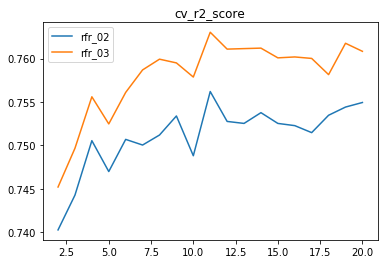

In [142]:
plt.figure(1)
plt.subplot(111)
plt.plot(cv_range, results_rfr_02, label='rfr_02')
plt.plot(cv_range, results_rfr_03, label='rfr_03')
plt.title('cv_r2_score')
plt.legend(loc='upper left')
# plt.savefig('01.png',dpi=300,format='png')
plt.show()
#plt.close()

## Use all data for training

In [155]:
y_01 = df_01['price']
X_01 = df_01.drop(['price'], axis = 1)
X_test_01 = df_test_01.drop(['id'], axis = 1)
id_test_01 = df_test_01['id']

In [156]:
X_train_all, X_val_all, y_train_all, y_val_all =train_test_split(
    X_01, y_01, test_size = 0., random_state = 222 )

In [157]:
X_train_all = vec.fit_transform(X_train_all.to_dict(orient = 'record'))

In [158]:
X_test_01 = vec.transform(X_test_01.to_dict(orient = 'record'))

In [ ]:
rfr_01 = RandomForestRegressor( bootstrap= False ,n_jobs = -1, n_estimators=5000,
                               max_features='sqrt')

In [160]:
rfr_01.fit(X_train_all, y_train_all)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [64]:
rfr_test_predict_01 = rfr_01.predict(X_test_01)

0.77853715674459312

## Create a csv file

In [226]:
rfr_result = pd.concat([df_test.id,  pd.DataFrame(rfr_test_predict_01)  ], axis=1)

In [227]:
rfr_result.columns = ['id','predict']
rfr_result.id = rfr_result.id.apply(np.int64)

In [229]:
rfr_result.to_csv('submit_01.csv', index=False)

## XGBoost (with best performance so far on this dataset)

In [105]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [106]:
xgb_01 = xgb.XGBRegressor(base_score=0.5, colsample_bytree=0.9, gamma=0,
                          learning_rate=0.075, max_depth=5, min_child_weight=1,
                          missing=None, n_estimators=250, reg_alpha=0, reg_lambda=1,
                          scale_pos_weight=1, subsample=0.9)

In [ ]:
##              Typical Parameter range:
# gamma:                                        use 0 first
# learning_rate: [0.01, 0.2]
# min_child_weight:                use CV!      use 1 first
# max_depth: [3, 10]               use CV!      use 5 first
# subsample: [0.5, 0.9]                         use 0.8 first
# colsample_bytree: [0.5, 0.9]                  use 0.8 first
# scale_pos_weight: positive

In [107]:
xgb_01.fit(X_train_01, y_train_01)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.075, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=250, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.9)

In [108]:
xgb_val_predict_01 = xgb_01.predict(X_val_01)
print r2_score(y_val_01, xgb_val_predict_01 )

0.798642753443


In [ ]:
xgb_test_predict_01 = xgb_01.predict(X_test_01)
# 0.803

In [ ]:
param_01 = {'max_depth':range(3,5,2), 'min_child_weight':range(1,3,2)}
gsearch_01 = GridSearchCV(
   estimator = xgb.XGBRegressor(base_score=0.5, colsample_bytree=0.8, gamma=0,
                            learning_rate=0.1, missing=None, n_estimators=500,
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8),   
   param_grid = param_01, scoring='mean_squared_error', n_jobs=-1, iid=True, cv=5
                         )

In [ ]:
gsearch_01.fit(X_train_01, y_train_01)
gsearch_01.grid_scores_, gsearch_01.best_params_, gsearch_01.best_score_

## Prepare train/val/test data for  SVR

In [116]:
y_01 = df_01['price']
X_01 = df_01.drop(['price'], axis = 1)
X_test_01 = df_test_01.drop(['id'], axis = 1)
id_test_01 = df_test_01['id']

In [117]:
list_categ =[]
list_num =[]
for name in X_01.columns:
    if type(df[name][0])==str:
        list_categ.append(name)
    else:
        list_num.append(name)
        df[name]=df[name].apply(np.float64)
#    print(name, type(df[name][0]))
    
#y_01 = y_01.apply(np.float64)

In [118]:
#print(list_categ)
#print(list_num)

In [119]:
X_01_num = X_01.drop(list_categ, axis = 1)
X_01_cate = X_01.drop(list_num, axis = 1)
X_test_01_num = X_test_01.drop(list_categ, axis = 1)
X_test_01_cate = X_test_01.drop(list_num, axis = 1)

In [120]:
ss_X = StandardScaler()
ss_y = StandardScaler()

In [121]:
X_01_num = ss_X.fit_transform(X_01_num)
X_test_01_num = ss_X.transform(X_test_01_num)
y_01 = ss_y.fit_transform(y_01)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [122]:
X_01 = pd.concat([pd.DataFrame(X_01_num),  X_01_cate  ], axis=1)
X_test_01 = pd.concat([pd.DataFrame(X_test_01_num),  X_test_01_cate  ], axis=1)
X_01.columns = list_num + list_categ
X_test_01.columns = list_num + list_categ

In [123]:
X_train_01, X_val_01, y_train_01, y_val_01 =train_test_split(
    X_01, y_01, test_size = 0.3, random_state = 222 )

In [124]:
vec = DictVectorizer()

In [125]:
X_train_01 = vec.fit_transform(X_train_01.to_dict(orient = 'record'))
X_test_01 = vec.transform(X_test_01.to_dict(orient = 'record'))

In [126]:
X_val_01 = vec.transform(X_val_01.to_dict(orient = 'record'))

## SVR

In [127]:
svr_01 = SVR( kernel = 'rbf', C = 2.0, epsilon= 0.1,  gamma = 0.09)

In [128]:
svr_01.fit(X_train_01, y_train_01)

SVR(C=2.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.09,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [256]:
#scores = cross_val_score(svr_01, X_train_01, y_train_01, cv = 10, n_jobs = -1, )
#print(scores.mean())

### r2_score on validation data:

In [129]:
svr_val_normalizedVal_01 = svr_01.predict(X_val_01)

In [130]:
r2_score(y_val_01, svr_val_normalizedVal_01 )

0.79908411254367451

### r2_score on training data:

In [131]:
#svr_train_normalizedPredict_01 = svr_01.predict(X_train_01)
#r2_score(y_train_01, svr_train_normalizedPredict_01 )

0.87294438414229603

### r2_score on testing data:

In [83]:
#svr_test_normalizedPredict_01 = svr_01.predict(X_test_01)

0.79744427820522124

In [84]:
svr_test_predict_01 = ss_y.inverse_transform(svr_test_normalizedPredict_01)

In [260]:
combine_predict = (svr_test_predict_01 + rfr_test_predict_01)/2.0

In [85]:
combine_predict = (svr_test_predict_01 + xgb_test_predict_01)/2.0

In [132]:
# 0.8092

## Cross Validation

In [198]:
#svr_02 = SVR( kernel = 'rbf', C = 5.0, epsilon= 0.1,  gamma = 0.03)

In [135]:
svr_03 = SVR( kernel = 'rbf', C = 10.0, epsilon= 0.1,  gamma = 0.1)

In [133]:
cv_range = range(2,21,2)
#cv_range = [2, 3, 5, 10]
results_svr = []

In [136]:
for cv_val in cv_range:
    scores = cross_val_score(svr_03, X_train_01, y_train_01, cv = cv_val, n_jobs = -1, )
    results_svr = np.append(results_svr, scores.mean() )

In [139]:
# print(results_svr)
results_svr_03 = results_svr

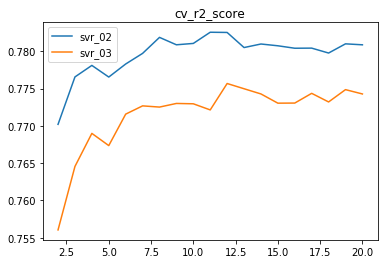

In [207]:
plt.figure(2)
plt.subplot(111)
plt.plot(cv_range, results_svr_02, label='svr_02')
plt.plot(cv_range, results_svr_03, label='svr_03')
plt.title('cv_r2_score')
plt.legend(loc='upper left')
# plt.savefig('01.png',dpi=300,format='png')
plt.show()
#plt.close()

### --->           10-fold cv seems to be ok

## Search for better parameters

In [238]:
C_range = [1.5, 2.0, 2.5, 3, 3.5]
gamma_range = [0.05, 0.07, 0.09, 0.11, 0.13, 0.15]
results_para_svr = []
best_C = 0.
best_gamma = 0.
max_score = 0.
for C_val in C_range:
    for gamma_val in gamma_range:
        svr_search = SVR( kernel = 'rbf', C = C_val, epsilon= 0.1,  gamma = gamma_val)
        scores = cross_val_score(svr_search, X_train_01, y_train_01, cv = 12 , n_jobs = -1, )
        mean_score = scores.mean()
        if  mean_score > max_score:
            max_score = mean_score
            best_C = C_val
            best_gamma = gamma_val
        results_para_svr = np.append( results_para_svr, mean_score )
print(best_C, best_gamma, max_score)

(2.0, 0.09, 0.79425314675064185)


To make an array with :    
row_index <===>  C_val    
column_undex <===>  gamma_val    

In [239]:
results_para_svr = np.reshape(results_para_svr, (len(C_range), len(gamma_range))  )

In [138]:
#print(results_para_svr)

### optimal parameters :  (2.0, 0.09, 0.79425314675064185)

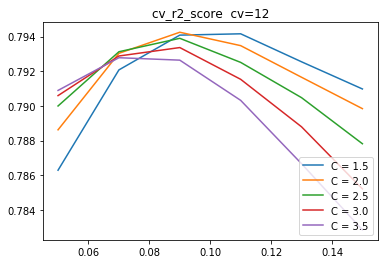

In [241]:
plt.figure(6)
plt.subplot(111)
plt.plot(gamma_range, results_para_svr[0,:], label='C = 1.5')
plt.plot(gamma_range, results_para_svr[1,:], label='C = 2.0')
plt.plot(gamma_range, results_para_svr[2,:], label='C = 2.5')
plt.plot(gamma_range, results_para_svr[3,:], label='C = 3.0')
plt.plot(gamma_range, results_para_svr[4,:], label='C = 3.5')
plt.title('cv_r2_score  cv=12')
plt.legend(loc='lower right')
# plt.savefig('01.png',dpi=300,format='png')
plt.show()
#plt.close()

## Create a csv file

In [318]:
comb_result = pd.concat([df_test.id,  pd.DataFrame(combine_predict)  ], axis=1)
comb_result.columns = ['id','predict']
comb_result.id = comb_result.id.apply(np.int64)
comb_result.to_csv('submit_03.csv', index=False)

## A shallow Neural Network

In [265]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

Using TensorFlow backend.


In [266]:
from numpy import genfromtxt
from numpy.random import random, permutation
from keras.utils import np_utils
from keras.utils.data_utils import get_file

In [267]:
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Dense, Activation, Dropout, Flatten, Lambda
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from sklearn.utils import shuffle
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l1,l2
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization

In [100]:
#from scipy.sparse import csr_matrix

In [268]:
def NN_r2_score(y_true, y_pred):
    SS_res =  np.sum(np.square(y_true - y_pred)) 
    SS_tot = np.sum(np.square(y_true - np.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot+0.0001) )

## Prepare train/val/test data for NN

In [ ]:
#batches = get_batches(path+'train', shuffle=False, batch_size=batch_size)
#val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)

In [269]:
##y_01 = ss_y.fit_transform(y_01)
##y_test_01 = ss_y.transform(AN_list)
X_01 = pd.concat([pd.DataFrame(X_01_num),  X_01_cate  ], axis=1)
X_test_01 = pd.concat([pd.DataFrame(X_test_01_num),  X_test_01_cate  ], axis=1)
X_01.columns = list_num + list_categ
X_test_01.columns = list_num + list_categ

In [271]:
X_train_01, X_val_01, y_train_01, y_val_01 =train_test_split(
    X_01, y_01, test_size = 0.3, random_state = 222 )

In [273]:
X_train_01 = vec.fit_transform(X_train_01.to_dict(orient = 'record'))
X_test_01 = vec.transform(X_test_01.to_dict(orient = 'record'))

In [274]:
X_val_01 = vec.transform(X_val_01.to_dict(orient = 'record'))

In [276]:
train_x = X_train_01.toarray()
train_y = y_train_01
test_x = X_test_01.toarray()
#test_y = y_test_01 

In [277]:
val_x = X_val_01.toarray()
val_y = y_val_01

In [278]:
print(train_x.shape) 
print(train_y.shape )
print(test_x.shape) 
print(test_y.shape) 

(3428, 62)
(3428,)
(5000, 62)
(5000,)


In [726]:
#model = Sequential()
#model.add(Dense(1, activation='linear',  input_shape=(train_x.shape[1],) ,
#                         W_regularizer = l2(lambda_w )   ) )

In [496]:
#model = Sequential()
#model.add(   Dense(256, activation='relu',  input_shape=(train_x.shape[1],) ,
#                         W_regularizer = l2(lambda_w )   )   )
#model.add(BatchNormalization())
#model.add(Dropout(p))
#model.add(Dense(1, activation='linear', name='output',
#                         W_regularizer = l2(lambda_w )   )  )

##  Use the NN model below:

In [279]:
lambda_w = 0.00
p = 0.4
earlyStopping=EarlyStopping(monitor = 'val_loss', patience = 3)

In [280]:
model = Sequential()
model.add(   Dense(512, activation='relu',  input_shape=(train_x.shape[1],) ,
                         W_regularizer = l2(lambda_w )   )   )
model.add(BatchNormalization())
model.add(Dropout(p))
model.add(   Dense(32, activation=  'relu' ,
                         W_regularizer = l2(lambda_w )   )  )
model.add(BatchNormalization())
model.add(Dropout(p))
model.add(Dense(1, activation='linear', name='output',
                         W_regularizer = l2(lambda_w )   )  )

In [281]:
model.compile(optimizer=   Adam(lr=0.001, beta_1=0.9, beta_2=0.999,
                                  epsilon=1e-08, decay=0.0 ),
                                  loss='mse', metrics=['mse'])

In [282]:
model_history = model.fit( train_x, train_y, nb_epoch= 20,
                                                    batch_size=  32 ,
                                                    verbose= 1,
                                                    shuffle=True,
                                                    validation_split = 0.1,       
                                                    callbacks =[earlyStopping]    )    

Train on 3085 samples, validate on 343 samples
Epoch 1/20
3085/3085 [==============================] - 1s - loss: 2.0761 - mean_squared_error: 2.0761 - val_loss: 0.6481 - val_mean_squared_error: 0.6481
Epoch 2/20
3085/3085 [==============================] - 0s - loss: 1.2198 - mean_squared_error: 1.2198 - val_loss: 0.5660 - val_mean_squared_error: 0.5660
Epoch 3/20
3085/3085 [==============================] - 0s - loss: 0.8181 - mean_squared_error: 0.8181 - val_loss: 0.3943 - val_mean_squared_error: 0.3943
Epoch 4/20
3085/3085 [==============================] - 0s - loss: 0.6813 - mean_squared_error: 0.6813 - val_loss: 0.3036 - val_mean_squared_error: 0.3036
Epoch 5/20
3085/3085 [==============================] - 0s - loss: 0.5888 - mean_squared_error: 0.5888 - val_loss: 0.2524 - val_mean_squared_error: 0.2524
Epoch 6/20
3085/3085 [==============================] - 0s - loss: 0.4811 - mean_squared_error: 0.4811 - val_loss: 0.2142 - val_mean_squared_error: 0.2142
Epoch 7/20
3085/3085 [=

In [284]:
loss = model_history.history.get('loss')
#mse = model_history.history.get('mean_squared_error')
val_loss = model_history.history.get('val_loss')
#val_mse = model_history.history.get('val_mean_squared_error')

## Plot loss/val_loss vs. epoch

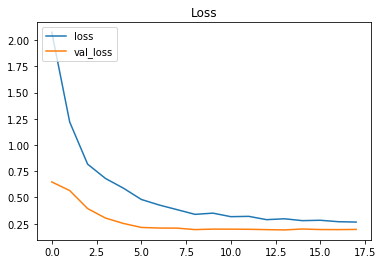

In [286]:
plt.figure(0)
plt.subplot(111)
plt.plot(range(len(loss)), loss,label='loss')
plt.plot(range(len(val_loss)), val_loss, label='val_loss')
plt.title('Loss')
plt.legend(loc='upper left')
#plt.subplot(122)
#plt.plot(range(len(acc)), acc,label='accuracy')
#plt.plot(range(len(val_acc)), val_acc, label='val_accuracy')
#plt.title('Accuracy')
plt.show()
#plt.savefig('01.png',dpi=300,format='png')
#plt.close()

### r2_score on training data:

In [287]:
NN_y_normalizedpredict = model.predict(train_x)
NN_y_normalizedpredict = np.reshape(NN_y_normalizedpredict, (train_x.shape[0], )  )
score_train = NN_r2_score(train_y, NN_y_normalizedpredict)
print(score_train)

0.823883122424


### r2_score on validation data:

In [290]:
y_NN_val_predict = model.predict(val_x)
y_NN_val_predict = np.reshape(y_NN_val_predict, (val_y.shape[0], )  )
score_val = NN_r2_score(val_y, y_NN_val_predict)
print (score_val)

0.758691692489


### r2_score on test data:

In [ ]:
NN_y_normalizedPredict_test = model.predict(test_x)
NN_y_normalizedPredict_test = np.reshape(NN_y_normalizedPredict_test, (test_x.shape[0], )  )
#score_test = NN_r2_score(test_y, NN_y_normalizedPredict_test )
#NN_y_predict_01 = ss_y.inverse_transform(NN_y_normalizedPredict_01)                         
#NN_y_predict_01 = np.reshape(NN_y_predict_01, (test_x.shape[0], ) )

In [289]:
NN_y_Predict_test = ss_y.inverse_transform(NN_y_normalizedPredict_test)

0.788750117448


### combined prediction:

In [295]:
combine_predict = (svr_test_predict_01 + rfr_test_predict_01 + NN_y_Predict_test)/3.0


In [286]:
mean_test = test_y.mean()
rel_err=[]
for idx in range(len(test_y)):
    rel_err.append(abs(NN_y_normalizedPredict_test[idx]-test_y[idx])/abs(test_y[idx]- mean_test   ))